In [1]:
! pip install adversarial-robustness-toolbox

     |████████████████████████████████| 1.1 MB 949 kB/s eta 0:00:01


# Module

In [2]:
#Import Library
import random
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow with Keras.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D, Dropout
tf.compat.v1.disable_eager_execution()

# Dataset

In [3]:
# MNIST 데이터셋 준비

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 각 데이터 크기 출력
print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"x_test.shape: {x_test.shape}")
print(f"y_test.shape: {y_test.shape}")

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


# Preprocessing

In [4]:
# Normalization - x
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

x_train_norm = x_train.astype('float32')/255.0
x_test_norm = x_test.astype('float32') / 255.0

print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))
#print(f"x_train.shape: {x_train.shape}")

최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0


In [5]:
# Normalization - y (One-hot-encoding)
y_train_norm = tf.keras.utils.to_categorical(y_train, 10)
y_test_norm = tf.keras.utils.to_categorical(y_test, 10)

# Model

In [13]:
from keras.layers import Input,Conv2D,Dropout, Dense,Flatten,GlobalAveragePooling2D,MaxPool2D
from keras.models import Model

#  tf.keras의 Sequential API를 이용하여 LeNet 모델 생성
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [15]:
# 채널수 맞추기
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))


Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


# Train Model

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])


In [18]:
model.fit(x_train_reshaped, y_train_norm, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1852 - accuracy: 0.9444
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0622 - accuracy: 0.9812
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0463 - accuracy: 0.9858
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0368 - accuracy: 0.9885
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0291 - accuracy: 0.9910
Epoch 6/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0234 - accuracy: 0.9927
Epoch 7/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0202 - accuracy: 0.9938
Epoch 8/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0169 - accuracy: 0.9946
Epoch 9/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0136 - accuracy: 0.9954
Epoch 10/10
60

In [22]:
# 평가
loss, acc = model.evaluate(x_test_reshaped, y_test_norm)
print('Accuracy on benign test example: {}%'.format(acc*100))

Accuracy on benign test example: 98.87999892234802%


#### JSMA는 Untargeted 이므로, y_test label를 shuffle 해준다.
하지만, 우연의 일치로 원본 label과 같은 경우가 생기긴 한다 ㅠ

In [6]:
# 레이블을 설정해보세요.
labels = ["0",  # index 0
        "1",      # index 1
        "2",     # index 2 
        "3",        # index 3 
        "4",         # index 4
        "5",       # index 5
        "6",        # index 6 
        "7",      # index 7 
        "8",          # index 8 
        "9"]   # index 9

def idx2label(idx):
    return labels[idx]

In [7]:
# 함수에 레이블 적용
idx2label(y_test[0])

'7'

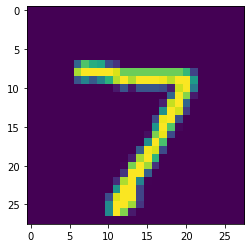

7


In [8]:
# 28x28의 흑백 이미지를 plt를 이용하여 출력하는 코드를 작성해보세요
# imshow
plt.imshow(x_test[0])
plt.show()
print(idx2label(y_test[0]))

In [9]:
def show(idx):
    plt.imshow(x_test[idx])
    plt.title(idx2label(y_test[idx]))
    plt.show()

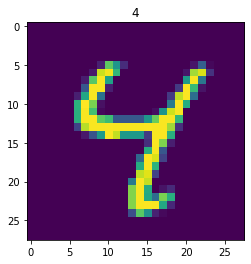

In [10]:
show(6)

In [19]:
# 원본 y_test
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [24]:
# 랜덤 y_test
import random
np.random.shuffle(y_test)
y_test[:10]

array([2, 5, 5, 4, 9, 4, 2, 7, 2, 6], dtype=uint8)

# Model Evaluation

In [11]:
predictions = model.predict(x_test_reshaped)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on benign test example: {}%'.format(accuracy*100))

Accuracy on benign test example: 98.75%


# Adversarial Examples

# 2. Jacobian Saliency Map Attack (JSMA)
- Origin - **99.1%**
- theta=0.3,gamma=0.1,batch_size=50 = **100% ??**

In [49]:
# ART
import art
from art.estimators.classification import KerasClassifier

#Wrap model with ART Keras Classifier
estimator_jsma = KerasClassifier(model=model, clip_values=(0,1), use_logits=False)

In [85]:
from art.attacks.evasion import SaliencyMapMethod

#Create jsma Instance
attack_jsma = SaliencyMapMethod(estimator_jsma, theta=0.3,
                                     gamma=0.1,batch_size=50)

#Create Adversarial Examples
x_attack_jsma = attack_jsma.generate(x_test_reshaped)

JSMA:   0%|          | 0/200 [00:00<?, ?it/s]

In [86]:
loss,acc = model.evaluate(x_attack_jsma,y_test_random_norm)
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 9.950000047683716%


## Other test

In [77]:
# test2
from art.attacks.evasion import SaliencyMapMethod

#Create jsma Instance
attack_jsma = SaliencyMapMethod(estimator_jsma, theta=0.3,
                                     gamma=0.5,batch_size=50)

#Create Adversarial Examples
x_attack_jsma = attack_jsma.generate(x_test_reshaped)

JSMA:   0%|          | 0/200 [00:00<?, ?it/s]

In [78]:
loss,acc = model.evaluate(x_attack_jsma,y_test_random_norm)
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 9.929999709129333%


In [79]:
# test3
from art.attacks.evasion import SaliencyMapMethod

#Create jsma Instance
attack_jsma = SaliencyMapMethod(estimator_jsma, theta=0.3,
                                     gamma=0.7,batch_size=50)

#Create Adversarial Examples
x_attack_jsma = attack_jsma.generate(x_test_reshaped)

JSMA:   0%|          | 0/200 [00:00<?, ?it/s]

In [80]:
loss,acc = model.evaluate(x_attack_jsma,y_test_random_norm)
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 9.719999879598618%


In [87]:
# test3-1
from art.attacks.evasion import SaliencyMapMethod

#Create jsma Instance
attack_jsma = SaliencyMapMethod(estimator_jsma, theta=0.3,
                                     gamma=1.0,batch_size=50)

#Create Adversarial Examples
x_attack_jsma = attack_jsma.generate(x_test_reshaped)

JSMA:   0%|          | 0/200 [00:00<?, ?it/s]

In [88]:
loss,acc = model.evaluate(x_attack_jsma,y_test_random_norm)
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 10.440000146627426%


In [81]:
# test4
from art.attacks.evasion import SaliencyMapMethod

#Create jsma Instance
attack_jsma = SaliencyMapMethod(estimator_jsma, theta=0.5,
                                     gamma=0.5,batch_size=50)

#Create Adversarial Examples
x_attack_jsma = attack_jsma.generate(x_test_reshaped)

JSMA:   0%|          | 0/200 [00:00<?, ?it/s]

In [82]:
loss,acc = model.evaluate(x_attack_jsma,y_test_random_norm)
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 10.050000250339508%


In [83]:
# test5
from art.attacks.evasion import SaliencyMapMethod

#Create jsma Instance
attack_jsma = SaliencyMapMethod(estimator_jsma, theta=0.7,
                                     gamma=0.5,batch_size=50)

#Create Adversarial Examples
x_attack_jsma = attack_jsma.generate(x_test_reshaped)

JSMA:   0%|          | 0/200 [00:00<?, ?it/s]

In [84]:
loss,acc = model.evaluate(x_attack_jsma,y_test_random_norm)
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 10.100000351667404%


In [89]:
# test4-0
from art.attacks.evasion import SaliencyMapMethod

#Create jsma Instance
attack_jsma = SaliencyMapMethod(estimator_jsma, theta=0.1,
                                     gamma=0.5,batch_size=50)

#Create Adversarial Examples
x_attack_jsma = attack_jsma.generate(x_test_reshaped)

JSMA:   0%|          | 0/200 [00:00<?, ?it/s]

In [90]:
loss,acc = model.evaluate(x_attack_jsma,y_test_random_norm)
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 10.199999809265137%


In [93]:
# test6
from art.attacks.evasion import SaliencyMapMethod

#Create jsma Instance
attack_jsma = SaliencyMapMethod(estimator_jsma, theta=1.0,
                                     gamma=0.5,batch_size=50)

#Create Adversarial Examples
x_attack_jsma = attack_jsma.generate(x_test_reshaped)

JSMA:   0%|          | 0/200 [00:00<?, ?it/s]

In [94]:
loss,acc = model.evaluate(x_attack_jsma,y_test_random_norm)
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 9.309999644756317%


In [91]:
# test7
from art.attacks.evasion import SaliencyMapMethod

#Create jsma Instance
attack_jsma = SaliencyMapMethod(estimator_jsma, theta=0.1,
                                     gamma=1.0,batch_size=50)

#Create Adversarial Examples
x_attack_jsma = attack_jsma.generate(x_test_reshaped)

JSMA:   0%|          | 0/200 [00:00<?, ?it/s]

In [92]:
loss,acc = model.evaluate(x_attack_jsma,y_test_random_norm)
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 9.459999948740005%


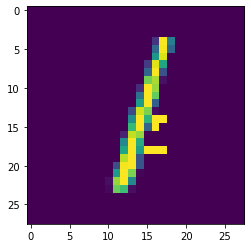

In [95]:
# Show Adversarial Examples
plt.imshow(x_attack_jsma[2].reshape(28,28))